In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import openpathsampling as paths
import numpy as np

storage = paths.storage.Storage("mstis.nc")

In [2]:
mstis = storage.networks.load(0)

In [3]:
print mstis

Multiple State TIS Network:
RETISTransition: Out B
B -> B or all states except B
Interface: 0.0<opB<0.04
Interface: 0.0<opB<0.09
Interface: 0.0<opB<0.16
RETISTransition: Out A
A -> A or all states except A
Interface: 0.0<opA<0.04
Interface: 0.0<opA<0.09
Interface: 0.0<opA<0.16
RETISTransition: Out C
C -> C or all states except C
Interface: 0.0<opC<0.04
Interface: 0.0<opC<0.09
Interface: 0.0<opC<0.16



In [4]:
mstis.hist_args['max_lambda'] = { 'bin_width' : 0.02, 'bin_range' : (0.0, 0.5) }
mstis.hist_args['pathlength'] = { 'bin_width' : 5, 'bin_range' : (0, 150) }

In [6]:
len(storage.steps)

5001

In [7]:
mstis.rate_matrix(storage)

,"{x|opA(x) in [0.0, 0.04]}","{x|opB(x) in [0.0, 0.04]}","{x|opC(x) in [0.0, 0.04]}"
"{x|opA(x) in [0.0, 0.04]}",NaN,0.0002068896,2.68622e-05
"{x|opB(x) in [0.0, 0.04]}",3.283403e-05,NaN,5.721081e-05
"{x|opC(x) in [0.0, 0.04]}",-0.0002572934,-1.540137e-05,NaN


In [8]:
stateA = storage.volumes.find_first("A")
stateB = storage.volumes.find_first("B")
stateC = storage.volumes.find_first("C")

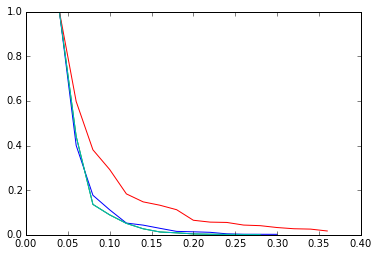

In [16]:
tcp_AB = mstis.transitions[(stateA, stateB)].tcp
tcp_BA = mstis.transitions[(stateB, stateA)].tcp
tcp_AC = mstis.transitions[(stateA, stateC)].tcp
tcp_BC = mstis.transitions[(stateB, stateC)].tcp
tcp_CA = mstis.transitions[(stateC, stateA)].tcp

plt.plot(tcp_AB.x, tcp_AB)
plt.plot(tcp_BA.x, tcp_BA)
plt.plot(tcp_CA.x, tcp_CA)
plt.plot(tcp_BC.x, tcp_BC)